In [31]:
from typing import Callable, TypeVar, List, Iterator
from scratch.linear_algebra import Vector, distance, add, scalar_multiply, vector_mean
import matplotlib.pyplot as plt
import random

In [3]:
def difference_qoutient(f: Callable[[float], float], x: float, h: float) -> float:
    return (f(x + h) - f(x)) / h

In [4]:
def square(x: float) -> float:
    return x * x


def derivative(x: float) -> float:
    return 2 * x

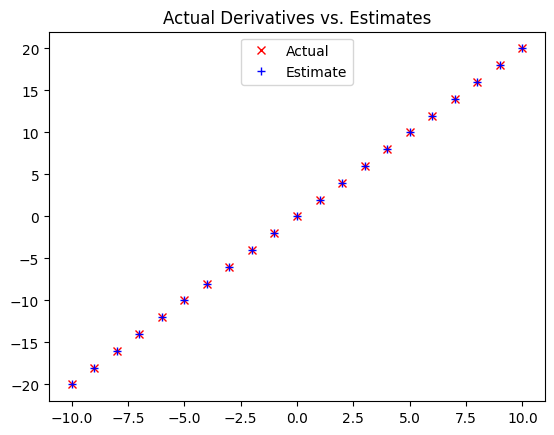

In [5]:
xs = range(-10, 11)
actuals = [derivative(x) for x in xs]
estimates = [difference_qoutient(square, x, h=0.001) for x in xs]

plt.title("Actual Derivatives vs. Estimates")
plt.plot(xs, actuals, 'rx', label='Actual')
plt.plot(xs, estimates, 'b+', label='Estimate')
plt.legend(loc=9)
plt.show()

In [ ]:
def partial_difference_quotient(f: Callable[[Vector], float],
                                v: Vector,
                                i: int,
                                h: float) -> float:
    w = [ v_i + (h if i == j else 0) for j, v_i in enumerate(v)]

    return (f(w) - f(v)) / h

In [ ]:
def estimate_gradient(f: Callable[[Vector], float],
                      v: Vector,
                      h: float = 0.0001):
    
    return [partial_difference_quotient(f, v, i, h) for i in range(len(v))]


In [21]:
def gradient_step(v: Vector, gradient: Vector, step_size: float) -> Vector:
    
    assert len(v) == len(gradient)

    step = scalar_multiply(step_size, gradient)

    return add(v, step)

def sum_of_squares_gradient(v: Vector) -> Vector:
    return [2 * v_i for v_i in v]

v = [random.uniform(-10, 10) for i in range(3)]

for epoch in range(1001):
    grad = sum_of_squares_gradient(v)
    v = gradient_step(v, grad, -0.01)

    if epoch == 0 or epoch % 100 == 0:
        print(epoch, v)

print(distance(v, [0, 0, 0]))

0 [-2.7934461614636024, -1.7845567659048145, 3.816491966845458]
100 [-0.37046558934920615, -0.2366671257632734, 0.5061414697189376]
200 [-0.04913098193377977, -0.031386689113613, 0.06712425693404321]
300 [-0.006515729004731017, -0.004162488771254043, 0.008901989144358127]
400 [-0.0008641130869379897, -0.0005520274122606078, 0.0011805778469046889]
500 [-0.00011459829383256035, -7.320963025573159e-05, 0.00015656770975568373]
600 [-1.5197974834370577e-05, -9.709028651734209e-06, 2.076394013525738e-05]
700 [-2.0155486730338617e-06, -1.2876070679624254e-06, 2.7537045193630764e-06]
800 [-2.6730116990200964e-07, -1.7076187752012223e-07, 3.651950704233062e-07]
900 [-3.544936244255251e-08, -2.264636436047287e-08, 4.843200805449196e-08]
1000 [-4.70127870388346e-09, -3.003350784116677e-09, 6.423031399277832e-09]
8.507494915670027e-09


In [ ]:
def linear_gradient(x: float, y: float, theta: Vector) -> Vector:
    slope, intercept = theta
    predicted = slope * x + intercept
    error = predicted - y
    squared_error = error ** 2
    grad = [2 * error * x, 2 * error]
    return grad

In [30]:
inputs = [(x, 20 * x + 5) for x in range(-50, 50)]

theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

learning_rate = 0.001

for epoch in range(500):
    grad = vector_mean([linear_gradient(x, y, theta) for x, y in inputs])

    theta = gradient_step(theta, grad, -learning_rate)

    if epoch == 0 or epoch % 100 == 0:
        print(epoch, theta)

print(theta)

0 [33.85186221023662, 0.9654900873045227]
100 [19.99802047937513, 1.7040969706895874]
200 [19.998379532609874, 2.301920822187037]
300 [19.998673459357043, 2.7913090327566574]
400 [19.998914072515042, 3.19193008533699]
[19.99910926137003, 3.5169196461222936]


In [32]:
T = TypeVar('T')

In [33]:
def minibatches(dataset: List[T],
                batch_size: int,
                shuffle: bool = True) -> Iterator[List[T]]:
    batch_starts = [start for start in range(0, len(dataset), batch_size)]

    if shuffle: random.shuffle(batch_starts)

    for start in batch_starts:
        end = start + batch_size
        yield dataset[start:end]


In [34]:
inputs = [(x, 20 * x + 5) for x in range(-50, 50)]

theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

learning_rate = 0.001

for epoch in range(500):
    for batch in minibatches(inputs, batch_size=20):
        grad = vector_mean([linear_gradient(x, y, theta) for x, y in batch])
        theta = gradient_step(theta, grad, -learning_rate)

    if epoch == 0 or epoch % 100 == 0:
        print(epoch, theta)

print(theta)

0 [17.14908674482433, -0.7242137821661204]
100 [20.000389100501067, 3.6806024973061335]
200 [19.98765774974719, 4.714514441150522]
300 [20.00237954418017, 4.943622296083909]
400 [19.9963990208298, 4.978082441079873]
[19.99998317385276, 4.995009454787987]


In [41]:
inputs = [(x, 20 * x + 5) for x in range(-50, 50)]

theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

learning_rate = 0.001

for epoch in range(500):
    for x, y in inputs:
        grad = linear_gradient(x, y, theta)
        theta = gradient_step(theta, grad, -learning_rate)

    if epoch == 0 or epoch % 100 == 0:
        print(epoch, theta)

print(theta)

0 [20.087242414846404, 0.6577687465943391]
100 [20.00108714518762, 4.94589046209264]
200 [20.000013534001706, 4.999325729261802]
300 [20.000000172383043, 4.999991597576358]
400 [19.999999996974314, 4.999999895383629]
[20.00000000735524, 5.000000000145529]
